# Exercícios

1. Definir as funções abaixo:

  1. `def ideal(M, N, D0)`, onde `M`, `N` representam o número de linhas e colunas, `D0` uma frequência de corte. A função deve retornar o filtro passa-baixa ideal.
  
  2. `def butter(M, N, n, D0)`, que retornará o filtro de Butterworth de grau `n`.
  
  3. `def gauss(M, N, D0)`, que retorna o filtro gaussiano passa-baixa com variância `D0^2`.
  
2. Utilizar Lena.png, e aplicar os filtros que você implementar em `1a`, `1b` e `1c`.

3. Agora, defina novas versões para as funções `1a`, `1b` e `1c` de forma a retornar filtros "passa-banda" com lâminas `D0` e `D1` onde `D1>D0`, `D in [D0, D1]`

## Imagens e Lena.png

![](Lena.png)

In [1]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from ipywidgets import interactive

from matplotlib import colorbar
from matplotlib.colors import LogNorm, Normalize, to_rgb

from mpl_toolkits.axes_grid1 import make_axes_locatable

from PIL import Image

mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8

In [2]:
def add_colorbar(ax, pos='right', size=0.1, pad=0.05, 
                 cmap=None, norm=None, off=False, 
                 orientation='vertical', sharex=None):
    divider = make_axes_locatable(ax)
    bar = divider.append_axes(pos, size, pad=pad, sharex=sharex)
    
    if isinstance(cmap, str):
        cmap = matplotlib.cm.cmap_d[cmap]

    if off:
        bar.axis('off')
    else:
        colorbar.ColorbarBase(bar, cmap=cmap, norm=norm, 
                              orientation=orientation)

    return bar

In [3]:
word = 2**8-1
norml8 = Normalize(0, word)

img = np.asarray(Image.open('Lena.png').convert('L'), dtype=float)
print(img/word)

assert img.shape == (512, 512)

W, H = img.shape

[[0.54901961 0.54901961 0.54901961 ... 0.35294118 0.35294118 0.35294118]
 [0.54901961 0.54901961 0.54901961 ... 0.35294118 0.35294118 0.35294118]
 [0.52941176 0.52941176 0.56078431 ... 0.35294118 0.35294118 0.35294118]
 ...
 [0.42745098 0.42745098 0.44313725 ... 0.09411765 0.09411765 0.09411765]
 [0.41568627 0.41568627 0.43137255 ... 0.09019608 0.09019608 0.09019608]
 [0.41568627 0.41568627 0.43137255 ... 0.09019608 0.09019608 0.09019608]]


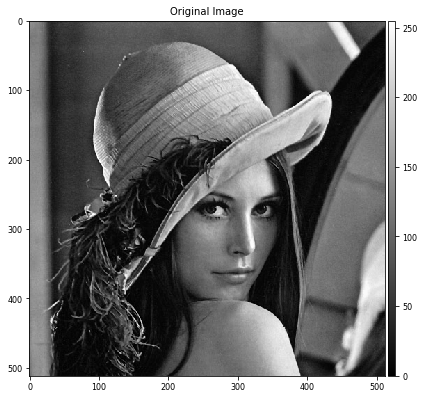

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.set_tight_layout(True)

def drawimg(ax, title, img, cmap, norm):
    ax.set_title(title)
    ax.imshow(img, cmap=cmap, norm=norm)
    add_colorbar(ax, cmap=cmap, norm=norm)
    
drawimg(ax, 'Original Image', img, 'gray', norml8)

## Filtros

In [5]:
normlgs = LogNorm(1, np.sum(img))
normlp = Normalize(0, np.log1p(np.sum(img)))
norml0 = Normalize(0, 1)

In [6]:
def ideal(shape, D0):
    assert len(shape) == 2
    
    u, v = np.mgrid[0:shape[0], 0:shape[1]]
    
    D = np.sqrt((u-shape[0]/2)**2 + (v-shape[0]/2)**2)
    
    return (D <= D0).astype(float)

In [7]:
def butter(shape, n, D0):
    assert len(shape) == 2
    
    u, v = np.mgrid[0:shape[0], 0:shape[1]]
    
    D = np.sqrt((u-shape[0]/2)**2 + (v-shape[0]/2)**2)
    
    return 1/(1+(D/D0)**(2.0*n))

In [8]:
def gauss(shape, D0):
    assert len(shape) == 2
    
    u, v = np.mgrid[0:shape[0], 0:shape[1]]
    
    D = np.sqrt((u-shape[0]/2)**2 + (v-shape[0]/2)**2)
    
    return np.e**(-(D**2)/(2*D0**2))

## Filtragem "passa-baixa"

In [9]:
def plot(n=4, D0=np.sqrt(np.min(img.shape))):
    fig, axis = plt.subplots(4, 4, figsize=(16, 16))
    fig.set_tight_layout(True)

    n = 2**n
    

    img_fft = np.fft.fftshift(np.fft.fft2(img))
    img_ifft = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft)))

    axis[0, 0].axis('off')
    drawimg(axis[0, 1], 'Original image', img, 'gray', norml8)
    drawimg(axis[0, 2], 'FFT image', np.log1p(np.abs(img_fft)), 'viridis', normlp)
    drawimg(axis[0, 3], 'IFFT image', img_ifft, 'gray', norml8)


    flt_idl = ideal(img.shape, D0)
    flt_idl_fft = np.fft.fftshift(np.fft.fft2(flt_idl))
    img_fft_idl = img_fft*flt_idl
    img_ifft_idl = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_idl)))

    drawimg(axis[1, 0], 'FFT ideal filter', np.log1p(np.abs(flt_idl_fft)), 'viridis', normlp)
    drawimg(axis[1, 1], 'Ideal filter', flt_idl, 'gray', norml0)
    drawimg(axis[1, 2], 'FFT image with ideal filter', np.log1p(np.abs(img_fft_idl)), 'viridis', normlp)
    drawimg(axis[1, 3], 'IFFT image with ideal filter', img_ifft_idl, 'gray', norml8)


    flt_but = butter(img.shape, n, D0)
    flt_but_fft = np.fft.fftshift(np.fft.fft2(flt_but))
    img_fft_but = img_fft*flt_but
    img_ifft_but = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_but)))

    drawimg(axis[2, 0], 'FFT ideal butter', np.log1p(np.abs(flt_but_fft)), 'viridis', normlp)
    drawimg(axis[2, 1], 'Ideal butter', flt_but, 'gray', norml0)
    drawimg(axis[2, 2], 'FFT image with ideal butter', np.log1p(np.abs(img_fft_but)), 'viridis', normlp)
    drawimg(axis[2, 3], 'IFFT image with ideal butter', img_ifft_but, 'gray', norml8)


    flt_gss = gauss(img.shape, D0)
    flt_gss_fft = np.fft.fftshift(np.fft.fft2(flt_gss))
    img_fft_gss = img_fft*flt_gss
    img_ifft_gss = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_gss)))

    drawimg(axis[3, 0], 'FFT ideal gauss', np.log1p(np.abs(flt_gss_fft)), 'viridis', normlp)
    drawimg(axis[3, 1], 'Ideal gauss', flt_gss, 'gray', norml0)
    drawimg(axis[3, 2], 'FFT image with ideal gauss', np.log1p(np.abs(img_fft_gss)), 'viridis', normlp)
    drawimg(axis[3, 3], 'IFFT image with ideal gauss', img_ifft_gss, 'gray', norml8)

interactive(plot, n=(0, 10, 1), D0=(0, np.min(img.shape)/2, 10))

interactive(children=(IntSlider(value=4, description='n', max=10), FloatSlider(value=22.627416997969522, descr…

## Filtragem "passa-alta"

In [10]:
def plot(n=4, D0=np.sqrt(np.min(img.shape))):
    fig, axis = plt.subplots(4, 4, figsize=(16, 16))
    fig.set_tight_layout(True)

    n = 2**n


    img_fft = np.fft.fftshift(np.fft.fft2(img))
    img_ifft = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft)))

    axis[0, 0].axis('off')
    drawimg(axis[0, 1], 'Original image', img, 'gray', norml8)
    drawimg(axis[0, 2], 'FFT image', np.log1p(np.abs(img_fft)), 'viridis', normlp)
    drawimg(axis[0, 3], 'IFFT image', img_ifft, 'gray', norml8)


    flt_idl = 1-ideal(img.shape, D0)
    flt_idl_fft = np.fft.fftshift(np.fft.fft2(flt_idl))
    img_fft_idl = img_fft*flt_idl
    img_ifft_idl = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_idl)))

    drawimg(axis[1, 0], 'FFT ideal filter', np.log1p(np.abs(flt_idl_fft)), 'viridis', normlp)
    drawimg(axis[1, 1], 'Ideal filter', flt_idl, 'gray', norml0)
    drawimg(axis[1, 2], 'FFT image with ideal filter', np.log1p(np.abs(img_fft_idl)), 'viridis', normlp)
    drawimg(axis[1, 3], 'IFFT image with ideal filter', img_ifft_idl, 'gray', norml8)


    flt_but = 1-butter(img.shape, n, D0)
    flt_but_fft = np.fft.fftshift(np.fft.fft2(flt_but))
    img_fft_but = img_fft*flt_but
    img_ifft_but = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_but)))

    drawimg(axis[2, 0], 'FFT ideal butter', np.log1p(np.abs(flt_but_fft)), 'viridis', normlp)
    drawimg(axis[2, 1], 'Ideal butter', flt_but, 'gray', norml0)
    drawimg(axis[2, 2], 'FFT image with ideal butter', np.log1p(np.abs(img_fft_but)), 'viridis', normlp)
    drawimg(axis[2, 3], 'IFFT image with ideal butter', img_ifft_but, 'gray', norml8)


    flt_gss = 1-gauss(img.shape, D0)
    flt_gss_fft = np.fft.fftshift(np.fft.fft2(flt_gss))
    img_fft_gss = img_fft*flt_gss
    img_ifft_gss = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_gss)))

    drawimg(axis[3, 0], 'FFT ideal gauss', np.log1p(np.abs(flt_gss_fft)), 'viridis', normlp)
    drawimg(axis[3, 1], 'Ideal gauss', flt_gss, 'gray', norml0)
    drawimg(axis[3, 2], 'FFT image with ideal gauss', np.log1p(np.abs(img_fft_gss)), 'viridis', normlp)
    drawimg(axis[3, 3], 'IFFT image with ideal gauss', img_ifft_gss, 'gray', norml8)

interactive(plot, n=(0, 10, 1), D0=(0, np.min(img.shape)/2, 10))

interactive(children=(IntSlider(value=4, description='n', max=10), FloatSlider(value=22.627416997969522, descr…

## Filtragem "passa-banda"

In [11]:
def plot(n=4, D0=np.sqrt(np.min(img.shape)), D1=2*np.sqrt(np.min(img.shape))):
    fig, axis = plt.subplots(4, 4, figsize=(16, 16))
    fig.set_tight_layout(True)

    n = 2**n


    img_fft = np.fft.fftshift(np.fft.fft2(img))
    img_ifft = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft)))

    axis[0, 0].axis('off')
    drawimg(axis[0, 1], 'Original image', img, 'gray', norml8)
    drawimg(axis[0, 2], 'FFT image', np.log1p(np.abs(img_fft)), 'viridis', normlp)
    drawimg(axis[0, 3], 'IFFT image', img_ifft, 'gray', norml8)


    flt_idl = ideal(img.shape, D1)-ideal(img.shape, D0)
    flt_idl_fft = np.fft.fftshift(np.fft.fft2(flt_idl))
    img_fft_idl = img_fft*flt_idl
    img_ifft_idl = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_idl)))

    drawimg(axis[1, 0], 'FFT ideal filter', np.log1p(np.abs(flt_idl_fft)), 'viridis', normlp)
    drawimg(axis[1, 1], 'Ideal filter', flt_idl, 'gray', norml0)
    drawimg(axis[1, 2], 'FFT image with ideal filter', np.log1p(np.abs(img_fft_idl)), 'viridis', normlp)
    drawimg(axis[1, 3], 'IFFT image with ideal filter', img_ifft_idl, 'gray', norml8)


    flt_but = butter(img.shape, n, D1)-butter(img.shape, n, D0)
    flt_but_fft = np.fft.fftshift(np.fft.fft2(flt_but))
    img_fft_but = img_fft*flt_but
    img_ifft_but = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_but)))

    drawimg(axis[2, 0], 'FFT ideal butter', np.log1p(np.abs(flt_but_fft)), 'viridis', normlp)
    drawimg(axis[2, 1], 'Ideal butter', flt_but, 'gray', norml0)
    drawimg(axis[2, 2], 'FFT image with ideal butter', np.log1p(np.abs(img_fft_but)), 'viridis', normlp)
    drawimg(axis[2, 3], 'IFFT image with ideal butter', img_ifft_but, 'gray', norml8)


    flt_gss = gauss(img.shape, D1)-gauss(img.shape, D0)
    flt_gss_fft = np.fft.fftshift(np.fft.fft2(flt_gss))
    img_fft_gss = img_fft*flt_gss
    img_ifft_gss = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_gss)))

    drawimg(axis[3, 0], 'FFT ideal gauss', np.log1p(np.abs(flt_gss_fft)), 'viridis', normlp)
    drawimg(axis[3, 1], 'Ideal gauss', flt_gss, 'gray', norml0)
    drawimg(axis[3, 2], 'FFT image with ideal gauss', np.log1p(np.abs(img_fft_gss)), 'viridis', normlp)
    drawimg(axis[3, 3], 'IFFT image with ideal gauss', img_ifft_gss, 'gray', norml8)

interactive(plot, n=(0, 10, 1), D0=(0, np.min(img.shape)/2, 10), D1=(1, np.min(img.shape)/2, 10))

interactive(children=(IntSlider(value=4, description='n', max=10), FloatSlider(value=22.627416997969522, descr…